In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from tensorflow.keras.utils import to_categorical
from scipy.stats import linregress

2022-10-08 13:55:26.696122: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df_list = pd.read_csv("Resources/cleandata/clean_listings.csv")
df_list.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0
1,953595,Seattle,WA,98119,47.639123,-122.365666,4,1.0,1.0,1.0,150,96.0
2,3308979,Seattle,WA,98119,47.629724,-122.369483,11,4.5,5.0,7.0,975,97.0
3,278830,Seattle,WA,98119,47.632918,-122.372471,6,2.0,3.0,3.0,450,92.0
4,5956968,Seattle,WA,98119,47.630525,-122.366174,2,1.0,1.0,1.0,120,95.0


In [3]:
df_cal = pd.read_csv("Resources/cleandata/clean_calendar.csv")
df_cal.head()

,listing_id,date,available,price
0,241032,1,t,85
1,241032,1,t,85
2,241032,1,t,85
3,241032,1,t,85
4,241032,1,t,85


In [4]:
df_cal_g = df_cal.groupby(['listing_id','date']).mean()
df_cal_g

price
listing_id date       
3335       1     120.0
           2     120.0
           3     120.0
           4     120.0
           5     120.0
...                ...
10340165   8      43.0
           9      43.0
           10     43.0
           11     43.0
           12     43.0

[33939 rows x 1 columns]

In [5]:
df_cal_g = df_cal_g.reset_index(level=['date'])
df_cal_g.head()

,date,price
listing_id,,
3335,1,120.0
3335,2,120.0
3335,3,120.0
3335,4,120.0
3335,5,120.0


In [6]:
df = df_list.merge(df_cal_g, how='inner', on='listing_id')
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,date,price_y
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [7]:
df.rename(columns={"price_y":'price','date':'month'}, inplace=True)
df.head()

,listing_id,city,state,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price_x,review_scores_rating,month,price
0,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,1,85.0
1,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,2,85.0
2,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,3,85.0
3,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,4,85.0
4,241032,Seattle,WA,98119,47.636289,-122.371025,4,1.0,1.0,1.0,85,95.0,5,85.0


In [8]:
df.drop(columns=['state','listing_id','price_x'], inplace=True)

In [9]:
df.head()

,city,zipcode,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,month,price
0,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,1,85.0
1,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,2,85.0
2,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,3,85.0
3,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,4,85.0
4,Seattle,98119,47.636289,-122.371025,4,1.0,1.0,1.0,95.0,5,85.0


(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 2.6000e+01, 0.0000e+00,
        8.0000e+00, 8.0000e+00, 1.2300e+02, 1.8200e+02, 2.3200e+02,
        1.1420e+03, 1.7220e+03, 6.9350e+03, 1.8073e+04]),
 array([ 20.        ,  25.71428571,  31.42857143,  37.14285714,
         42.85714286,  48.57142857,  54.28571429,  60.        ,
         65.71428571,  71.42857143,  77.14285714,  82.85714286,
         88.57142857,  94.28571429, 100.        ]),
 <BarContainer object of 14 artists>)

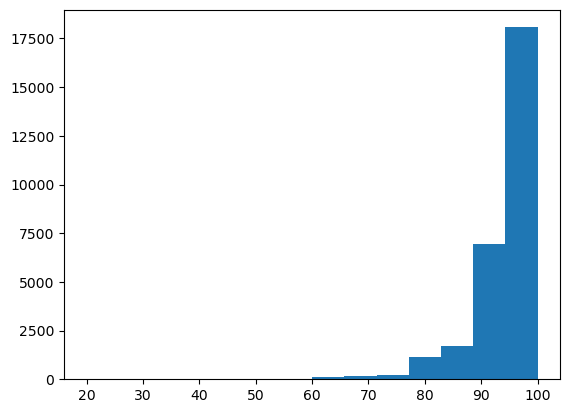

In [10]:
plt.hist(df['review_scores_rating'], bins=14)

(array([2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.6000e+01, 0.0000e+00, 1.2000e+01, 1.0300e+02,
        1.8300e+02, 3.1400e+02, 3.2470e+03, 2.4566e+04]),
 array([1.30103   , 1.35095642, 1.40088285, 1.45080928, 1.50073571,
        1.55066214, 1.60058857, 1.650515  , 1.70044143, 1.75036786,
        1.80029428, 1.85022071, 1.90014714, 1.95007357, 2.        ]),
 <BarContainer object of 14 artists>)

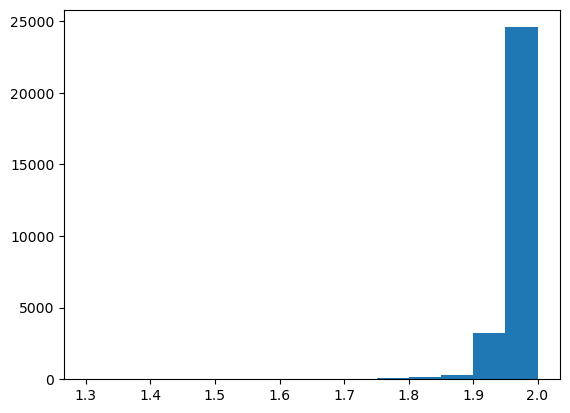

In [11]:
plt.hist(df['review_scores_rating'].apply(np.log10), bins=14)

In [12]:
df['review_scores_rating'] = df['review_scores_rating'].apply(np.log10)

(array([21084.,  4754.,  2381.,   167.,    67.]),
 array([0. , 1.4, 2.8, 4.2, 5.6, 7. ]),
 <BarContainer object of 5 artists>)

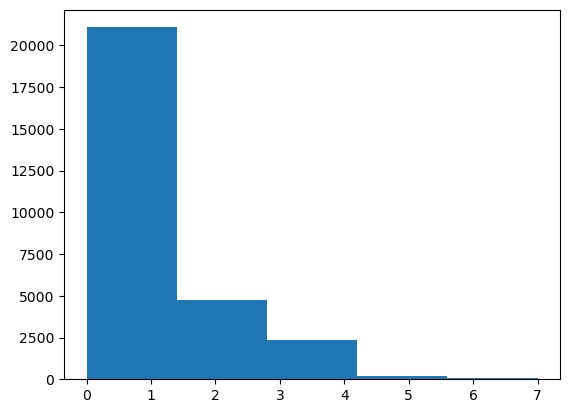

In [13]:
plt.hist(df['bedrooms'], bins=5)

(array([ 2680., 18404.,  4754.,  2381.,   234.]),
 array([0.        , 0.52915026, 1.05830052, 1.58745079, 2.11660105,
        2.64575131]),
 <BarContainer object of 5 artists>)

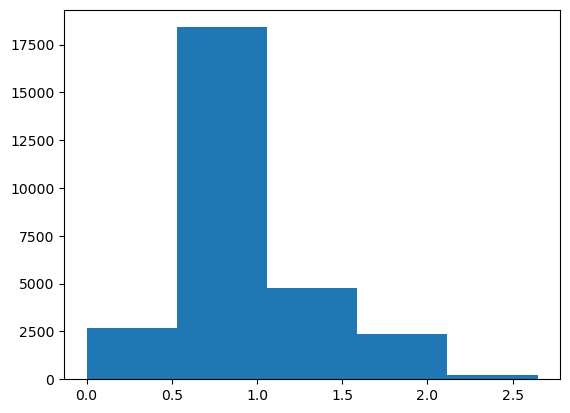

In [14]:
plt.hist(df['bedrooms'].apply(np.sqrt), bins=5)

In [15]:
df['bedrooms']=df['bedrooms'].apply(np.sqrt)

(array([2.3801e+04, 4.0490e+03, 5.7400e+02, 2.4000e+01, 5.0000e+00]),
 array([0. , 1.6, 3.2, 4.8, 6.4, 8. ]),
 <BarContainer object of 5 artists>)

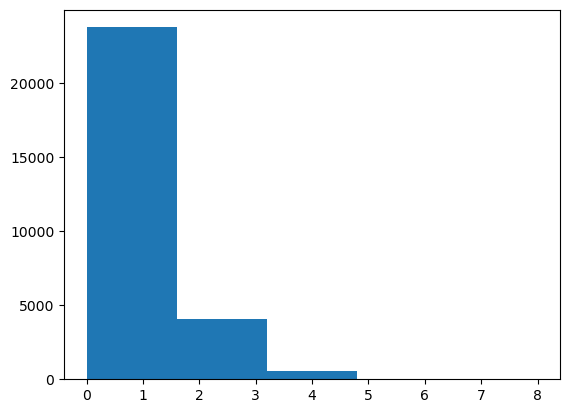

In [16]:
plt.hist(df['bathrooms'], bins=5)

(array([   38.,   226., 23537.,  4594.,    58.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. ]),
 <BarContainer object of 5 artists>)

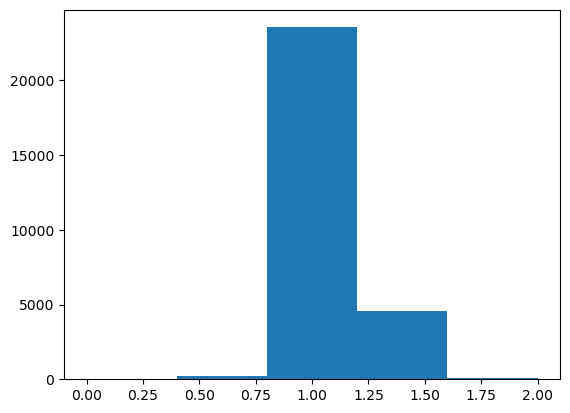

In [17]:
plt.hist(df['bathrooms'].apply(lambda x: pow(x,1/3)), bins=5)

In [18]:
df['bathrooms'] = df['bathrooms'].apply(lambda x: pow(x,1/3))

(array([16953.,  9794.,  1253.,   373.,    80.]),
 array([ 1.,  4.,  7., 10., 13., 16.]),
 <BarContainer object of 5 artists>)

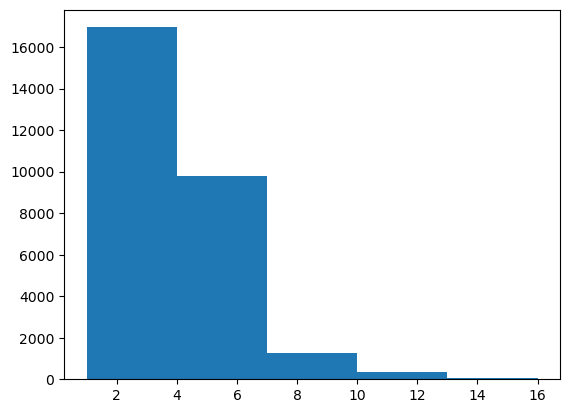

In [19]:
plt.hist(df['accommodates'], bins=5)

(array([ 1786., 15167.,  7163.,  3884.,   453.]),
 array([0.        , 0.240824  , 0.48164799, 0.72247199, 0.96329599,
        1.20411998]),
 <BarContainer object of 5 artists>)

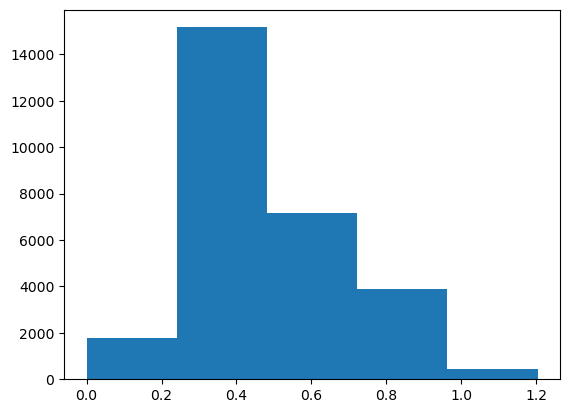

In [20]:
plt.hist(df['accommodates'].apply(np.log10), bins=5)

In [21]:
df['accommodates']=df['accommodates'].apply(np.log10)

In [22]:
enc = OneHotEncoder(sparse=False)
encode_df = pd.DataFrame(enc.fit_transform(df[['city','zipcode','month']]))
encode_df.columns = enc.get_feature_names(['city','zipcode','month'])

/Users/johnwhendricks/opt/anaconda3/envs/mlenv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [23]:
df = df.merge(encode_df, left_index=True, right_index=True)
df.drop(columns=['city','zipcode','month'], inplace=True)

In [24]:
df.head()

,latitude,longitude,accommodates,bathrooms,bedrooms,beds,review_scores_rating,price,"city_Ballard, Seattle",city_Phinney Ridge Seattle,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,47.636289,-122.371025,0.60206,1.0,1.0,1.0,1.977724,85.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
X = df.drop(columns=['price'])
y = df['price']

In [26]:
print(X.shape)
print(y.shape)

(28453, 53)
(28453,)


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [28]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
X_train_scaled

array([[-1.87062632, -1.40938203, -0.69637273, ..., -0.2925192 ,
        -0.29917003, -0.29777331],
       [ 0.97372679,  0.54067756,  1.63119838, ..., -0.2925192 ,
        -0.29917003, -0.29777331],
       [-0.30921311,  0.79028006, -0.69637273, ...,  3.41857902,
        -0.29917003, -0.29777331],
       ...,
       [-0.53617578, -0.14187146,  1.34479411, ..., -0.2925192 ,
        -0.29917003, -0.29777331],
       [-1.51230883,  1.09177664, -0.69637273, ..., -0.2925192 ,
        -0.29917003, -0.29777331],
       [ 0.90625901,  1.08072179,  0.59146016, ..., -0.2925192 ,
        -0.29917003, -0.29777331]])

In [30]:
y_train

14077    110.000000
5561     250.000000
6290     110.000000
1137      55.000000
9425     181.666667
            ...    
23824     97.645161
12419    150.161290
11169    135.647059
16948     73.750000
18617     94.615385
Name: price, Length: 21339, dtype: float64

In [31]:
input_dim = X.shape[1]

model = Sequential([
    Dense(200, input_dim = input_dim, activation='relu'),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
#     Dense(50, activation='relu'),
    Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               10800     
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 41,101
Trainable params: 41,101
Non-trainable params: 0
_________________________________________________________________


2022-10-08 13:55:32.121540: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


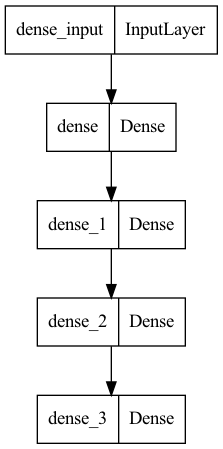

In [32]:
tf.keras.utils.plot_model(model)

In [33]:
model.compile(optimizer='adam',loss='mse')

In [34]:
history = model.fit(X_train_scaled, y_train, epochs=400)

Epoch 1/400
667/667 [==============================] - 1s 1ms/step - loss: 5540.2988
Epoch 2/400
667/667 [==============================] - 1s 1ms/step - loss: 3737.2573
Epoch 3/400
667/667 [==============================] - 1s 2ms/step - loss: 3584.9175
Epoch 4/400
667/667 [==============================] - 1s 2ms/step - loss: 3501.5789
Epoch 5/400
667/667 [==============================] - 1s 2ms/step - loss: 3380.5413
Epoch 6/400
667/667 [==============================] - 1s 2ms/step - loss: 3307.1248
Epoch 7/400
667/667 [==============================] - 1s 2ms/step - loss: 3193.5042
Epoch 8/400
667/667 [==============================] - 1s 2ms/step - loss: 3126.6426
Epoch 9/400
667/667 [==============================] - 1s 2ms/step - loss: 3050.1794
Epoch 10/400
667/667 [==============================] - 1s 1ms/step - loss: 2996.3757
Epoch 11/400
667/667 [==============================] - 1s 1ms/step - loss: 2920.1543
Epoch 12/400
667/667 [==============================] - 1s 1ms/

667/667 [==============================] - 1s 1ms/step - loss: 575.9630
Epoch 97/400
667/667 [==============================] - 1s 1ms/step - loss: 614.3890
Epoch 98/400
667/667 [==============================] - 1s 1ms/step - loss: 565.3324
Epoch 99/400
667/667 [==============================] - 1s 1ms/step - loss: 555.2140
Epoch 100/400
667/667 [==============================] - 1s 1ms/step - loss: 592.8636
Epoch 101/400
667/667 [==============================] - 1s 1ms/step - loss: 580.6312
Epoch 102/400
667/667 [==============================] - 1s 1ms/step - loss: 559.2088
Epoch 103/400
667/667 [==============================] - 1s 1ms/step - loss: 552.9994
Epoch 104/400
667/667 [==============================] - 1s 2ms/step - loss: 530.9789
Epoch 105/400
667/667 [==============================] - 1s 1ms/step - loss: 558.0693
Epoch 106/400
667/667 [==============================] - 1s 1ms/step - loss: 543.2652
Epoch 107/400
667/667 [==============================] - 1s 1ms/step - 

667/667 [==============================] - 1s 2ms/step - loss: 324.3045
Epoch 192/400
667/667 [==============================] - 1s 1ms/step - loss: 310.2411
Epoch 193/400
667/667 [==============================] - 1s 1ms/step - loss: 288.1930
Epoch 194/400
667/667 [==============================] - 1s 981us/step - loss: 279.0210
Epoch 195/400
667/667 [==============================] - 1s 1ms/step - loss: 284.8458
Epoch 196/400
667/667 [==============================] - 1s 1ms/step - loss: 273.5785
Epoch 197/400
667/667 [==============================] - 1s 2ms/step - loss: 286.2066
Epoch 198/400
667/667 [==============================] - 1s 1ms/step - loss: 300.0353
Epoch 199/400
667/667 [==============================] - 1s 1ms/step - loss: 288.4274
Epoch 200/400
667/667 [==============================] - 1s 2ms/step - loss: 277.3898
Epoch 201/400
667/667 [==============================] - 1s 2ms/step - loss: 298.0051
Epoch 202/400
667/667 [==============================] - 1s 1ms/st

667/667 [==============================] - 1s 1ms/step - loss: 189.2967
Epoch 287/400
667/667 [==============================] - 1s 2ms/step - loss: 201.3157
Epoch 288/400
667/667 [==============================] - 1s 1ms/step - loss: 189.1094
Epoch 289/400
667/667 [==============================] - 1s 2ms/step - loss: 195.4333
Epoch 290/400
667/667 [==============================] - 1s 1ms/step - loss: 191.5316
Epoch 291/400
667/667 [==============================] - 1s 2ms/step - loss: 189.7796
Epoch 292/400
667/667 [==============================] - 1s 2ms/step - loss: 199.8887
Epoch 293/400
667/667 [==============================] - 1s 2ms/step - loss: 192.0168
Epoch 294/400
667/667 [==============================] - 1s 1ms/step - loss: 181.1416
Epoch 295/400
667/667 [==============================] - 1s 2ms/step - loss: 179.9019
Epoch 296/400
667/667 [==============================] - 1s 2ms/step - loss: 182.4828
Epoch 297/400
667/667 [==============================] - 1s 2ms/step

667/667 [==============================] - 1s 1ms/step - loss: 143.8355
Epoch 382/400
667/667 [==============================] - 1s 1ms/step - loss: 140.3634
Epoch 383/400
667/667 [==============================] - 1s 1ms/step - loss: 147.7912
Epoch 384/400
667/667 [==============================] - 1s 1ms/step - loss: 149.7060
Epoch 385/400
667/667 [==============================] - 1s 1ms/step - loss: 135.7140
Epoch 386/400
667/667 [==============================] - 1s 1ms/step - loss: 141.3539
Epoch 387/400
667/667 [==============================] - 1s 1ms/step - loss: 147.3305
Epoch 388/400
667/667 [==============================] - 1s 1ms/step - loss: 165.2687
Epoch 389/400
667/667 [==============================] - 1s 1ms/step - loss: 133.7059
Epoch 390/400
667/667 [==============================] - 1s 1ms/step - loss: 135.1685
Epoch 391/400
667/667 [==============================] - 1s 1ms/step - loss: 146.3764
Epoch 392/400
667/667 [==============================] - 1s 1ms/step

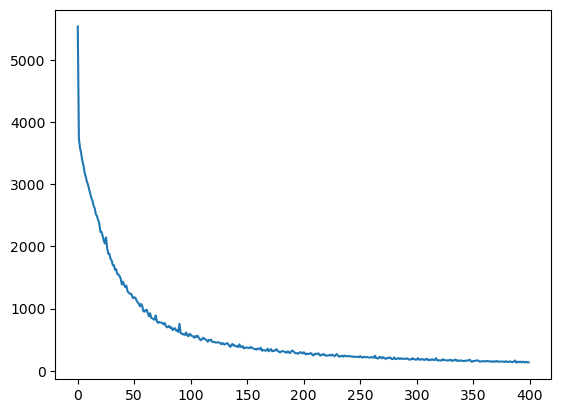

In [35]:
loss = history.history['loss']
plt.plot(loss)
plt.show()

In [36]:
y_pred = model.predict(X_test_scaled)

223/223 [==============================] - 0s 899us/step


Text(0.5, 0, 'predicted price')

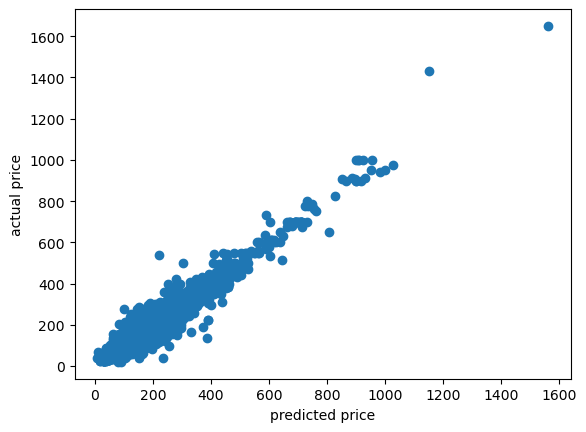

In [37]:
plt.scatter(y_pred, y_test)
plt.ylabel('actual price')
plt.xlabel('predicted price')

In [38]:
y_pred.tolist()

[[107.78541564941406],
 [114.23173522949219],
 [294.1794128417969],
 [137.1302032470703],
 [113.47996520996094],
 [93.89236450195312],
 [77.11558532714844],
 [67.54898071289062],
 [47.377471923828125],
 [71.54673767089844],
 [159.11270141601562],
 [87.10896301269531],
 [85.22908020019531],
 [91.43693542480469],
 [99.88667297363281],
 [86.07669830322266],
 [142.9385528564453],
 [72.57008361816406],
 [477.1148986816406],
 [80.46062469482422],
 [326.5443420410156],
 [92.22073364257812],
 [81.48160552978516],
 [151.37042236328125],
 [55.674495697021484],
 [100.69419860839844],
 [100.72718811035156],
 [161.18890380859375],
 [128.9906768798828],
 [183.35252380371094],
 [112.16960144042969],
 [93.94215393066406],
 [193.5354766845703],
 [77.68405151367188],
 [178.4197235107422],
 [62.959102630615234],
 [47.961997985839844],
 [359.9375305175781],
 [331.1309509277344],
 [205.7718048095703],
 [57.90835189819336],
 [85.29788208007812],
 [32.609561920166016],
 [170.6454620361328],
 [55.757320404052

In [39]:
y_test.values.tolist()

[71.58064516129032,
 90.0,
 290.0,
 134.0,
 100.0,
 80.0,
 84.03225806451613,
 60.806451612903224,
 39.0,
 69.0,
 179.0,
 86.5,
 106.13793103448276,
 58.38095238095238,
 107.27586206896552,
 75.0,
 135.0,
 55.0,
 487.4516129032258,
 85.0,
 382.741935483871,
 85.0,
 85.0,
 150.0,
 75.0,
 80.0,
 105.0,
 183.0,
 99.64516129032258,
 159.0,
 107.25806451612904,
 76.33333333333333,
 181.20689655172413,
 74.16129032258064,
 157.25806451612902,
 62.13333333333333,
 59.22222222222222,
 350.0,
 360.0,
 170.0,
 65.0,
 90.0,
 26.130434782608695,
 180.0,
 49.0,
 185.0,
 99.0,
 89.41935483870968,
 84.875,
 700.0,
 155.0,
 155.0,
 127.0,
 83.66666666666667,
 190.32258064516128,
 136.0,
 69.06666666666666,
 59.0,
 649.1428571428571,
 65.0,
 75.0,
 32.266666666666666,
 179.0,
 59.588235294117645,
 65.0,
 194.0,
 45.0,
 75.0,
 110.0,
 99.0,
 113.87096774193549,
 107.6086956521739,
 179.0,
 79.0,
 262.5,
 97.0,
 67.48387096774194,
 175.0,
 129.0,
 88.61290322580645,
 49.0,
 83.61538461538461,
 160.580645

In [104]:
results_df = pd.DataFrame({'predicted price':y_pred[:,0]})
results_df.head()

,predicted price
0,107.785416
1,114.231735
2,294.179413
3,137.130203
4,113.479965


In [105]:
results_df['actual price'] = y_test.values

In [106]:
results_df.head(20)

,predicted price,actual price
0,107.785416,71.580645
1,114.231735,90.000000
2,294.179413,290.000000
3,137.130203,134.000000
4,113.479965,100.000000
5,93.892365,80.000000
6,77.115585,84.032258
7,67.548981,60.806452
8,47.377472,39.000000
9,71.546738,69.000000


In [107]:
results_df['diff'] = abs(results_df['predicted price'] - results_df['actual price'])
results_df

,predicted price,actual price,diff
0,107.785416,71.580645,36.204770
1,114.231735,90.000000,24.231735
2,294.179413,290.000000,4.179413
3,137.130203,134.000000,3.130203
4,113.479965,100.000000,13.479965
...,...,...,...
7109,169.649078,99.000000,70.649078
7110,152.053238,159.482759,7.429521
7111,232.885788,228.000000,4.885788
7112,227.918152,240.433333,12.515181


In [108]:
diffs = results_df['diff'].sum() / results_df.shape[0]
results_df['lower'] = round(results_df['predicted price'] - results_df['predicted price']*0.025*diffs)
results_df['upper'] = round(results_df['predicted price'] + results_df['predicted price']*0.025*diffs)


results_df['accurate'] = (results_df['lower'] <= results_df['actual price']) & (results_df['actual price'] <= results_df['upper']) 
results_df.tail()

,predicted price,actual price,diff,lower,upper,accurate
7109,169.649078,99.000000,70.649078,103.0,237.0,False
7110,152.053238,159.482759,7.429521,92.0,212.0,True
7111,232.885788,228.000000,4.885788,141.0,325.0,True
7112,227.918152,240.433333,12.515181,138.0,318.0,True
7113,61.483276,68.000000,6.516724,37.0,86.0,True


In [109]:
results_df.head(20)

,predicted price,actual price,diff,lower,upper,accurate
0,107.785416,71.580645,36.204770,65.0,150.0,True
1,114.231735,90.000000,24.231735,69.0,159.0,True
2,294.179413,290.000000,4.179413,178.0,410.0,True
3,137.130203,134.000000,3.130203,83.0,191.0,True
4,113.479965,100.000000,13.479965,69.0,158.0,True
5,93.892365,80.000000,13.892365,57.0,131.0,True
6,77.115585,84.032258,6.916673,47.0,108.0,True
7,67.548981,60.806452,6.742529,41.0,94.0,True
8,47.377472,39.000000,8.377472,29.0,66.0,True
9,71.546738,69.000000,2.546738,43.0,100.0,True


In [110]:
results_df[results_df['accurate'] == False]

,predicted price,actual price,diff,lower,upper,accurate
55,96.344772,136.000000,39.655228,58.0,134.0,False
77,102.431297,175.000000,72.568703,62.0,143.0,False
162,142.160248,214.161290,72.001043,86.0,198.0,False
186,44.352825,85.000000,40.647175,27.0,62.0,False
207,87.731758,140.483871,52.752113,53.0,122.0,False
...,...,...,...,...,...,...
7077,108.163055,42.000000,66.163055,66.0,151.0,False
7078,119.168953,70.161290,49.007663,72.0,166.0,False
7081,86.327698,125.000000,38.672302,52.0,120.0,False
7096,125.504974,195.000000,69.495026,76.0,175.0,False


In [111]:
results_df['accurate'].value_counts()

True     6813
False     301
Name: accurate, dtype: int64

In [112]:
results_df['accurate'].value_counts()[1] / results_df['accurate'].value_counts().sum()

0.957689063817824

In [113]:
_, _, r_value, _, _ = linregress(results_df['predicted price'].values,results_df['actual price'].values)

In [114]:
print('r value:',r_value)

r value: 0.9721722137096833
